# Rf 2 0 5_Compplot
Addition and convolution: options for plotting components of composite p.d.f.s.




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:44 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


Set up composite pdf
--------------------------------------

Declare observable x

In [2]:
x = ROOT.RooRealVar("x", "x", 0, 10)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Create two Gaussian PDFs g1(x,mean1,sigma) anf g2(x,mean2,sigma) and
their parameters

In [3]:
mean = ROOT.RooRealVar("mean", "mean of gaussians", 5)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.5)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 1)
sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
sig2 = ROOT.RooGaussian("sig2", "Signal component 2", x, mean, sigma2)

Sum the signal components into a composite signal p.d.f.

In [4]:
sig1frac = ROOT.RooRealVar(
    "sig1frac", "fraction of component 1 in signal", 0.8, 0., 1.)
sig = ROOT.RooAddPdf(
    "sig", "Signal", ROOT.RooArgList(sig1, sig2), ROOT.RooArgList(sig1frac))

Build Chebychev polynomial p.d.f.

In [5]:
a0 = ROOT.RooRealVar("a0", "a0", 0.5, 0., 1.)
a1 = ROOT.RooRealVar("a1", "a1", -0.2, 0., 1.)
bkg1 = ROOT.RooChebychev("bkg1", "Background 1",
                         x, ROOT.RooArgList(a0, a1))

Build expontential pdf

In [6]:
alpha = ROOT.RooRealVar("alpha", "alpha", -1)
bkg2 = ROOT.RooExponential("bkg2", "Background 2", x, alpha)

Sum the background components into a composite background p.d.f.

In [7]:
bkg1frac = ROOT.RooRealVar(
    "sig1frac", "fraction of component 1 in background", 0.2, 0., 1.)
bkg = ROOT.RooAddPdf(
    "bkg", "Signal", ROOT.RooArgList(bkg1, bkg2), ROOT.RooArgList(sig1frac))

Sum the composite signal and background

In [8]:
bkgfrac = ROOT.RooRealVar("bkgfrac", "fraction of background", 0.5, 0., 1.)
model = ROOT.RooAddPdf(
    "model", "g1+g2+a", ROOT.RooArgList(bkg, sig), ROOT.RooArgList(bkgfrac))

Set up basic plot with data and full pdf
------------------------------------------------------------------------------

Generate a data sample of 1000 events in x from model

In [9]:
data = model.generate(ROOT.RooArgSet(x), 1000)

Plot data and complete PDF overlaid

In [10]:
xframe = x.frame(ROOT.RooFit.Title(
    "Component plotting of pdf=(sig1+sig2)+(bkg1+bkg2)"))
data.plotOn(xframe)
model.plotOn(xframe)

<ROOT.RooPlot object ("frame_x_555f6c4514c0") at 0x555f6c4514c0>

Clone xframe for use below

In [11]:
xframe2 = xframe.Clone("xframe2")

Make component by object reference
--------------------------------------------------------------------

Plot single background component specified by object reference

In [12]:
ras_bkg = ROOT.RooArgSet(bkg)
model.plotOn(xframe, ROOT.RooFit.Components(
    ras_bkg), ROOT.RooFit.LineColor(ROOT.kRed))

<ROOT.RooPlot object ("frame_x_555f6c4514c0") at 0x555f6c4514c0>

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: (bkg1,bkg2)


Plot single background component specified by object reference

In [13]:
ras_bkg2 = ROOT.RooArgSet(bkg2)
model.plotOn(xframe, ROOT.RooFit.Components(ras_bkg2), ROOT.RooFit.LineStyle(
    ROOT.kDashed), ROOT.RooFit.LineColor(ROOT.kRed))

<ROOT.RooPlot object ("frame_x_555f6c4514c0") at 0x555f6c4514c0>

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: (bkg)


Plot multiple background components specified by object reference
Note that specified components may occur at any level in object tree
(e.g bkg is component of 'model' and 'sig2' is component 'sig')

In [14]:
ras_bkg_sig2 = ROOT.RooArgSet(bkg, sig2)
model.plotOn(xframe, ROOT.RooFit.Components(ras_bkg_sig2),
             ROOT.RooFit.LineStyle(ROOT.kDotted))

<ROOT.RooPlot object ("frame_x_555f6c4514c0") at 0x555f6c4514c0>

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg,sig2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: (bkg1,bkg2,sig)


Make component by name/regexp
------------------------------------------------------------

Plot single background component specified by name

In [15]:
model.plotOn(xframe2, ROOT.RooFit.Components(
    "bkg"), ROOT.RooFit.LineColor(ROOT.kCyan))

<ROOT.RooPlot object ("xframe2") at 0x555f6c526ce0>

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: (bkg1,bkg2)


Plot multiple background components specified by name

In [16]:
model.plotOn(
    xframe2,
    ROOT.RooFit.Components("bkg1,sig2"),
    ROOT.RooFit.LineStyle(
        ROOT.kDotted),
    ROOT.RooFit.LineColor(
        ROOT.kCyan))

<ROOT.RooPlot object ("xframe2") at 0x555f6c526ce0>

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg1,sig2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: (bkg,sig)


Plot multiple background components specified by regular expression on
name

In [17]:
model.plotOn(
    xframe2,
    ROOT.RooFit.Components("sig*"),
    ROOT.RooFit.LineStyle(
        ROOT.kDashed),
    ROOT.RooFit.LineColor(
        ROOT.kCyan))

<ROOT.RooPlot object ("xframe2") at 0x555f6c526ce0>

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (sig,sig1,sig2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()


Plot multiple background components specified by multiple regular
expressions on name

In [18]:
model.plotOn(
    xframe2,
    ROOT.RooFit.Components("bkg1,sig*"),
    ROOT.RooFit.LineStyle(
        ROOT.kDashed),
    ROOT.RooFit.LineColor(
        ROOT.kYellow),
    ROOT.RooFit.Invisible())

<ROOT.RooPlot object ("xframe2") at 0x555f6c526ce0>

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg1,sig,sig1,sig2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: (bkg)


Draw the frame on the canvas

In [19]:
c = ROOT.TCanvas("rf205_compplot", "rf205_compplot", 800, 400)
c.Divide(2)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
xframe.GetYaxis().SetTitleOffset(1.4)
xframe.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
xframe2.GetYaxis().SetTitleOffset(1.4)
xframe2.Draw()

c.SaveAs("rf205_compplot.png")

Info in <TCanvas::Print>: png file rf205_compplot.png has been created


Draw all canvases 

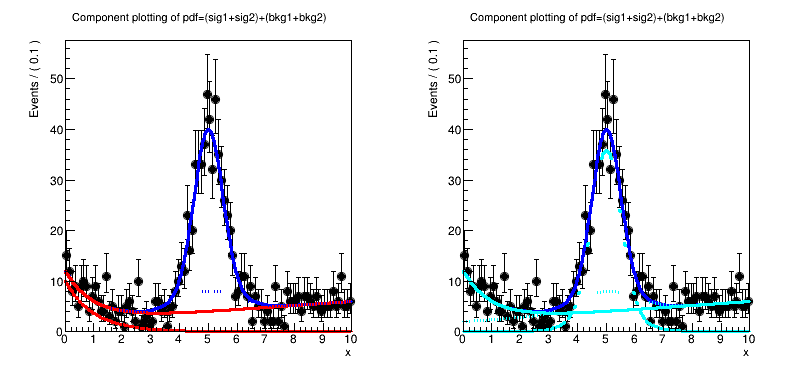

In [20]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()